# Importes de librerias que necesitamos

In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis inicial y tratamiento de nulos
**Cargamos un archivo CSV, inspeccionamos la estructura del DataFrame, identificamos valores nulos y mostramos las primeras filas para entender los datos.**

In [328]:
df = pd.read_csv("bmw_pricing_v3.csv")

print(df.info(), "\n")
print("NULOS:\n", df.isna().sum(), "\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


**Tras un análisis de los datos en equipo, hemos decidido eliminar estas dos columnas**
- **Marca**: Ya que todos los valores son "BMW", por lo que no aporta ningun tipo de info interesante
- **asientos_traseros_plegables**: Se decidio que no era necesaria para el análisis además de tener un 70% de nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4840 non-null   object 
 1   km                    4841 non-null   float64
 2   potencia              4842 non-null   float64
 3   fecha_registro        2420 non-null   object 
 4   tipo_gasolina         4838 non-null   object 
 5   color                 4398 non-null   object 
 6   tipo_coche            3383 non-null   object 
 7   volante_regulable     4839 non-null   object 
 8   aire_acondicionado    4357 non-null   object 
 9   camara_trasera        4841 non-null   object 
 10  elevalunas_electrico  4841 non-null   object 
 11  bluetooth             4115 non-null   object 
 12  gps                   4843 non-null   bool   
 13  alerta_lim_velocidad  4115 non-null   object 
 14  precio                4837 non-null   float64
 15  fecha_venta          

<Axes: >

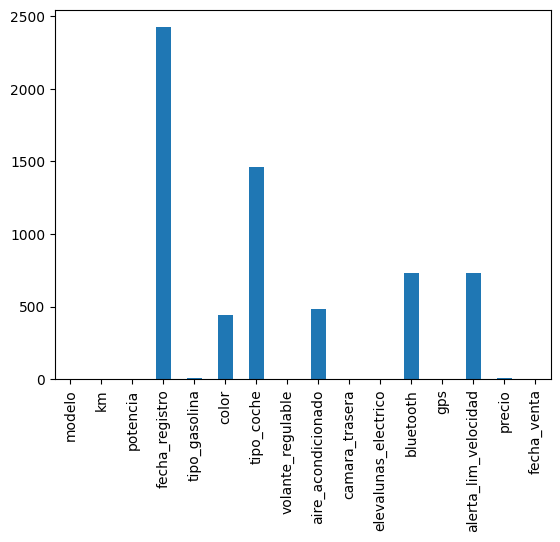

In [329]:
del_cols = ["marca", "asientos_traseros_plegables"]

for col in del_cols:
    del df[col]

print(df.info(), "\n")
print("NULOS:\n", df.isna().sum(), "\n")
df.isna().sum().plot(kind="bar")

Después de observar los datos, vimos que habían columnas con 6 o menos nulos, por lo que en estos casos decidimos eliminar las filas donde estaban esos nulos.

In [330]:
print("Antes de eliminar algunas filas con nulos")
print("Filas:", df.shape[0])

cols_pocos_nulos = ["modelo", "km", "potencia", "tipo_gasolina", "volante_regulable", "camara_trasera", "elevalunas_electrico", "precio", "fecha_venta"]
df.dropna(subset=cols_pocos_nulos, inplace=True)
df.reset_index(drop=True, inplace=True)

print("Después de eliminar algunas filas con nulos")
print("Filas:", df.shape[0])

Antes de eliminar algunas filas con nulos
Filas: 4843
Después de eliminar algunas filas con nulos
Filas: 4817


Al aplicar el cambio podemos ver que tan solo se borraron 26 filas en total, ahora nos toca volver a análizar los datos y ver que hacemos con las columnas con muchos nulos

In [331]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4817 non-null   object 
 1   km                    4817 non-null   float64
 2   potencia              4817 non-null   float64
 3   fecha_registro        2408 non-null   object 
 4   tipo_gasolina         4817 non-null   object 
 5   color                 4375 non-null   object 
 6   tipo_coche            3368 non-null   object 
 7   volante_regulable     4817 non-null   object 
 8   aire_acondicionado    4335 non-null   object 
 9   camara_trasera        4817 non-null   object 
 10  elevalunas_electrico  4817 non-null   object 
 11  bluetooth             4092 non-null   object 
 12  gps                   4817 non-null   bool   
 13  alerta_lim_velocidad  4092 non-null   object 
 14  precio                4817 non-null   float64
 15  fecha_venta          

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01


Podemos darnos cuenta que varias columnas que deberían ser bool el dataframe las tomó como object y suponemos que es porque contienen nulos ("gps" no tiene nulos y tiene el Dtype de bool).
También nos surge la duda de si las columnas float tienen bien sus valores o no, por lo que miramos sus rangos de valores.

In [332]:
df.describe()

,km,potencia,precio
count,4.817000e+03,4817.000000,4817.000000
mean,1.409353e+05,128.984845,15841.831015
std,6.024268e+04,39.004876,9223.064638
min,-6.400000e+01,0.000000,100.000000
25%,1.027580e+05,100.000000,10900.000000
50%,1.409910e+05,120.000000,14200.000000
75%,1.752350e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


Vemos que la columna "km" tiene como mínimo -64km, al no tener sentido ese dato procederemos a eliminar las filas que contengan un km inferior 0.

In [333]:
df.drop(df[df["km"] < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

df.describe()

,km,potencia,precio
count,4.816000e+03,4816.000000,4816.000000
mean,1.409645e+05,128.963870,15829.547342
std,6.021466e+04,38.981748,9184.530828
min,4.760000e+02,0.000000,100.000000
25%,1.028315e+05,100.000000,10875.000000
50%,1.410270e+05,120.000000,14200.000000
75%,1.752392e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


Nos resulta raro que el mínimo de potencia sea 0 por lo que mostramos el dataframe ordenado por la potencia de manera ascendente.

In [334]:
df.sort_values("potencia",ascending=True)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3741,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,NaN,11700.0,2018-03-01
1773,i3,152328.0,25.0,NaN,hybrid_petrol,black,NaN,False,True,False,False,False,True,NaN,20300.0,2018-04-01
1902,i3,152470.0,25.0,NaN,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,15500.0,2018-03-01
2367,318,170529.0,66.0,NaN,diesel,silver,hatchback,False,False,True,False,False,False,False,1000.0,2018-08-01
2748,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,False,False,False,False,1300.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,M3,33670.0,317.0,2014-03-01,petrol,blue,sedan,True,True,False,False,True,True,True,51200.0,2018-04-01
3068,M3,39250.0,317.0,2015-11-01,petrol,black,sedan,True,True,False,False,True,True,True,52400.0,2018-05-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
3577,M5,150187.0,412.0,NaN,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,2018-09-01


Podemos ver que el modelo "X1" es el unico coche con 0 de potencia, por lo que procedemos a mirar si tenemos más coches con modelo "X1" en nuestro dataframe, para ver su potencia.

In [335]:
df[df["modelo"] == "X1"]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3719,X1,54157.0,105.0,2013-05-01,diesel,white,suv,True,True,False,False,NaN,True,NaN,13100.0,2018-01-01
3720,X1,121114.0,135.0,2013-10-01,diesel,grey,suv,False,False,False,False,False,False,False,13100.0,2018-04-01
3722,X1,167417.0,105.0,NaN,diesel,white,suv,False,False,False,False,False,False,False,3600.0,2018-09-01
3723,X1,61354.0,105.0,NaN,diesel,blue,NaN,False,False,False,False,False,False,True,16900.0,2018-06-01
3724,X1,93308.0,135.0,NaN,diesel,white,suv,False,False,False,False,False,False,True,13900.0,2018-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,X1,137550.0,100.0,NaN,diesel,silver,NaN,True,True,False,True,False,True,True,13900.0,2018-09-01
4753,X1,140161.0,105.0,NaN,diesel,black,suv,False,False,False,False,False,False,NaN,10700.0,2018-09-01
4755,X1,221585.0,105.0,2011-05-01,diesel,silver,suv,True,NaN,False,False,NaN,True,False,9400.0,2018-09-01
4759,X1,120600.0,85.0,2013-03-01,diesel,black,NaN,False,NaN,True,False,False,False,NaN,11100.0,2018-09-01


In [336]:
print("Media:", df[df["modelo"] == "X1"]["potencia"].mean())
print("Moda:", df[df["modelo"] == "X1"]["potencia"].mode()[0])
df[df["modelo"] == "X1"]["potencia"].value_counts()

Media: 109.95255474452554
Moda: 105.0


potencia
105.0    91
100.0    54
85.0     36
135.0    33
120.0    31
130.0    13
160.0     9
150.0     3
110.0     2
0.0       1
137.0     1
Name: count, dtype: int64

Podemos ver que la media de potencia para este modelo es 109.95, mientras que el valor que más aparece es 105, al tener un valor similar, decidimos cambiar el valor 0.0 por 105

In [337]:
df.loc[df["potencia"] == 0.0, "potencia"] = 105.0

df.describe()

,km,potencia,precio
count,4.816000e+03,4816.000000,4816.000000
mean,1.409645e+05,128.985673,15829.547342
std,6.021466e+04,38.938944,9184.530828
min,4.760000e+02,25.000000,100.000000
25%,1.028315e+05,100.000000,10875.000000
50%,1.410270e+05,120.000000,14200.000000
75%,1.752392e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


Ahora que ya tenemos las columnas numericas con valores que nos hacen más sentido procedemos a volver a mirar que columnas nos quedan con nulos.

In [338]:
print(df.info(), "\n")
print("NULOS:\n", df.isna().sum(), "\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4816 entries, 0 to 4815
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4816 non-null   object 
 1   km                    4816 non-null   float64
 2   potencia              4816 non-null   float64
 3   fecha_registro        2408 non-null   object 
 4   tipo_gasolina         4816 non-null   object 
 5   color                 4374 non-null   object 
 6   tipo_coche            3367 non-null   object 
 7   volante_regulable     4816 non-null   object 
 8   aire_acondicionado    4334 non-null   object 
 9   camara_trasera        4816 non-null   object 
 10  elevalunas_electrico  4816 non-null   object 
 11  bluetooth             4091 non-null   object 
 12  gps                   4816 non-null   bool   
 13  alerta_lim_velocidad  4091 non-null   object 
 14  precio                4816 non-null   float64
 15  fecha_venta          

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01


Aquí vemos las columnas y sus nulos:
- color: 442
- tipo_coche: 1449
- aire_acondicionado: 482
- bluetooth: 725
- alerta_lim_velocidad: 725
- fecha_registro: 2408


Para acabar con los nulos de la columna "color" rellenaremos los nulos con la moda de cada modelo, por ejemplo, si el modelo X1 tiene de moda el color verde pues los campos de color nulos con modelo X1 se rellenaran con verde y en caso de que todos los modelos X1 fueran nulos pues usaremos la moda de toda la columna.

In [339]:
df_check_null_color = df[["modelo", "color"]]
lista_modelos_sin_color = df_check_null_color[df_check_null_color["color"].isna()]["modelo"].value_counts().iloc[:].index.to_list()

for i in lista_modelos_sin_color:
    print(i, end=", ")

320, 318, 520, X3, 116, X1, 316, X5, 118, 525, 530, 318 Gran Turismo, 120, X4, 420, 535, 518, 320 Gran Turismo, X6, 420 Gran Coupé, 530 Gran Turismo, X6 M, 640, 520 Gran Turismo, 330, M550, 114, 730, 218, 325, 335, 325 Gran Turismo, 435 Gran Coupé, 335 Gran Turismo, 640 Gran Coupé, 135, 740, X5 M, 218 Active Tourer, 225 Active Tourer, 

In [340]:
for modelo in lista_modelos_sin_color:
    mask = df["modelo"] == str(modelo)
    moda = df["color"].mode()[0] if df.loc[mask, "color"].isna().all() else df.loc[mask, "color"].mode()[0]
    df.loc[mask, "color"] = df.loc[mask, "color"].fillna(moda)

print("NULOS:\n", df.isna().sum(), "\n")

NULOS:
 modelo                     0
km                         0
potencia                   0
fecha_registro          2408
tipo_gasolina              0
color                      0
tipo_coche              1449
volante_regulable          0
aire_acondicionado       482
camara_trasera             0
elevalunas_electrico       0
bluetooth                725
gps                        0
alerta_lim_velocidad     725
precio                     0
fecha_venta                0
dtype: int64 



Ahora solo nos quedan las siguientes columnas con nulos:
- tipo_coche
- aire_acondicionado
- bluetooth
- alerta_lim_velocidad
- fecha_registro

Ahora aplicaremos una lógica parecida con las columnas tipo_coche, aire_acondicionado, bluetooth

In [341]:
df_check_null_tipo_coche = df[["modelo", "tipo_coche"]]
lista_modelos_sin_tipo_coche = df_check_null_tipo_coche[df_check_null_tipo_coche["tipo_coche"].isna()]["modelo"].value_counts().iloc[:].index.to_list()

for modelo in lista_modelos_sin_tipo_coche:
    mask = df["modelo"] == str(modelo)
    moda = df["tipo_coche"].mode()[0] if df.loc[mask, "tipo_coche"].isna().all() else df.loc[mask, "tipo_coche"].mode()[0]
    df.loc[mask, "tipo_coche"] = df.loc[mask, "tipo_coche"].fillna(moda)

print("NULOS:\n", df.isna().sum(), "\n")

NULOS:
 modelo                     0
km                         0
potencia                   0
fecha_registro          2408
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado       482
camara_trasera             0
elevalunas_electrico       0
bluetooth                725
gps                        0
alerta_lim_velocidad     725
precio                     0
fecha_venta                0
dtype: int64 



Al ver que se nos hacía repetitivo usar el código y quedaba muy engorroso, decidimos hacer una función para aplicar estos cambios.

In [342]:
def fill_nulls(df, target: str, is_bool=False):
    df_check_null_tipo_coche = df[["modelo", target]]
    lista_modelos_sin_tipo_coche = df_check_null_tipo_coche[df_check_null_tipo_coche[target].isna()]["modelo"].value_counts().iloc[:].index.to_list()

    for modelo in lista_modelos_sin_tipo_coche:
        mask = df["modelo"] == str(modelo)
        if is_bool == False:
            moda = df[target].mode()[0] if df.loc[mask, target].isna().all() else df.loc[mask, target].mode()[0]
        elif is_bool == True:
            moda = False if df.loc[mask, target].isna().all() else df.loc[mask, target].mode()[0]
        df.loc[mask, target] = df.loc[mask, target].fillna(moda)

    return df

In [343]:
print("Pre-función:")
print(df["aire_acondicionado"].value_counts(),"\n")
df = fill_nulls(df, "aire_acondicionado", is_bool=True)
print("Post-función:")
print(df["aire_acondicionado"].value_counts(), "\n")

print("Pre-función:")
print(df["bluetooth"].value_counts(),"\n")
df = fill_nulls(df, "bluetooth", is_bool=True)
print("Post-función:")
print(df["bluetooth"].value_counts(), "\n")

Pre-función:
aire_acondicionado
True     3448
False     886
Name: count, dtype: int64 

Post-función:
aire_acondicionado
True     3923
False     893
Name: count, dtype: int64 

Pre-función:
bluetooth
False    3100
True      991
Name: count, dtype: int64 

Post-función:
bluetooth
False    3795
True     1021
Name: count, dtype: int64 



C:\Users\PC\AppData\Local\Temp\ipykernel_16572\2609564867.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[mask, target] = df.loc[mask, target].fillna(moda)
C:\Users\PC\AppData\Local\Temp\ipykernel_16572\2609564867.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[mask, target] = df.loc[mask, target].fillna(moda)
C:\Users\PC\AppData\Local\Temp\ipykernel_16572\2609564867.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=Fal

Con estos prints podemos ver como evoluciona la cantidad de cada valor en las columnas antes y después de aplicar la función.

In [344]:
print("NULOS:\n", df.isna().sum(), "\n")

NULOS:
 modelo                     0
km                         0
potencia                   0
fecha_registro          2408
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado         0
camara_trasera             0
elevalunas_electrico       0
bluetooth                  0
gps                        0
alerta_lim_velocidad     725
precio                     0
fecha_venta                0
dtype: int64 



Ahora solo nos quedan las siguientes columnas con nulos:
- alerta_lim_velocidad
- fecha_registro

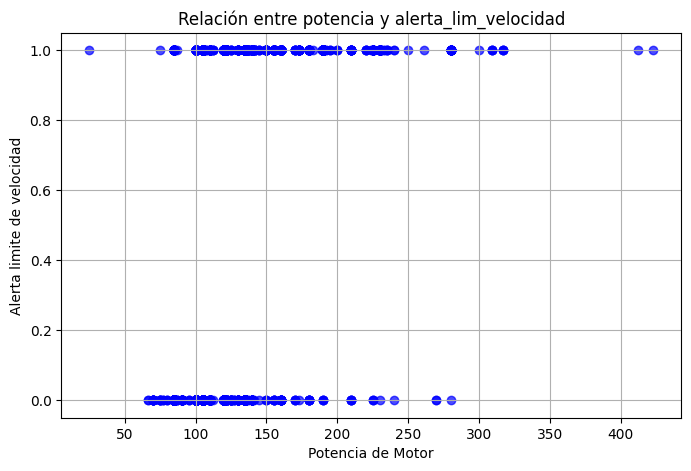

In [345]:
plt.figure(figsize=(8, 5))
plt.scatter(df['potencia'], df['alerta_lim_velocidad'], color='blue', alpha=0.7)
plt.title('Relación entre potencia y alerta_lim_velocidad')
plt.xlabel('Potencia de Motor')
plt.ylabel('Alerta limite de velocidad')
plt.grid(True)
plt.show()

Podemos ver que la columna "potencia" tiene varios outliers, ahora veremos cuantos valores se salen de los rangos "normales" (que parece ser entre 50 y 350).

In [346]:
print("Pre-borrado:", df.shape[0])
df.drop(df[(df["potencia"] < 50.0) | (df["potencia"] > 350.0)].index, axis=0, inplace=True)
print("Post-borrado:", df.shape[0])

Pre-borrado: 4816
Post-borrado: 4812


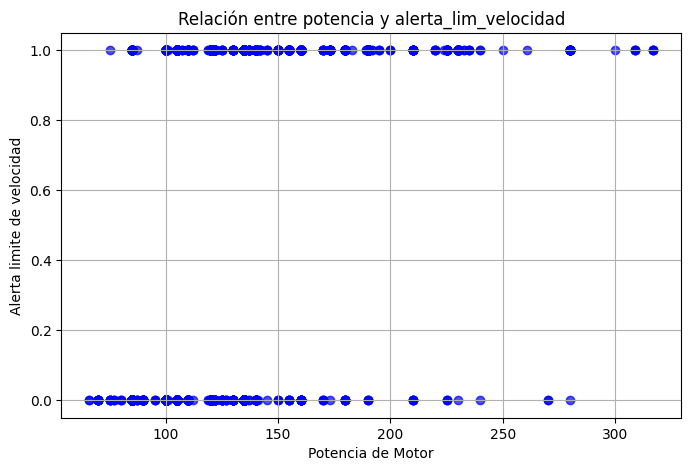

In [347]:
plt.figure(figsize=(8, 5))
plt.scatter(df['potencia'], df['alerta_lim_velocidad'], color='blue', alpha=0.7)
plt.title('Relación entre potencia y alerta_lim_velocidad')
plt.xlabel('Potencia de Motor')
plt.ylabel('Alerta limite de velocidad')
plt.grid(True)
plt.show()

Podemos ver que no hay mucha relación entre potencia y la alerta de limite de velocidad, ya que podemos ver que el False se concentra en potencias entre 50 y 200, y el True entre 100 y 350.

In [348]:
print(df[(df["potencia"] < 50.0) | (df["potencia"] > 350.0)].shape[0])

print(df.shape[0])

0
4812


In [349]:
df_sup = df.copy()
df_sup.dropna(subset="alerta_lim_velocidad", inplace=True)
df_sup["alerta_lim_velocidad"] = df_sup["alerta_lim_velocidad"].astype("int64")
df_sup = pd.DataFrame(df_sup.groupby("modelo").agg({"alerta_lim_velocidad": "sum", "potencia": "mean"}))
df_sup.sort_values("potencia", ascending=False)

,alerta_lim_velocidad,potencia
modelo,,
M4,2,317.000000
M3,6,311.666667
750,1,280.000000
M550,11,280.000000
X5 M50,3,280.000000
...,...,...
216 Active Tourer,0,85.000000
216 Gran Tourer,0,85.000000
316,39,84.837563


No parece ser que este relacionado el modelo con la potencia, por lo que lo rellenare con la moda segun su modelo.

In [350]:
df = fill_nulls(df, "alerta_lim_velocidad", is_bool=True)

df.isna().sum()

C:\Users\PC\AppData\Local\Temp\ipykernel_16572\2609564867.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[mask, target] = df.loc[mask, target].fillna(moda)
C:\Users\PC\AppData\Local\Temp\ipykernel_16572\2609564867.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[mask, target] = df.loc[mask, target].fillna(moda)
C:\Users\PC\AppData\Local\Temp\ipykernel_16572\2609564867.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=Fal

modelo                     0
km                         0
potencia                   0
fecha_registro          2405
tipo_gasolina              0
color                      0
tipo_coche                 0
volante_regulable          0
aire_acondicionado         0
camara_trasera             0
elevalunas_electrico       0
bluetooth                  0
gps                        0
alerta_lim_velocidad       0
precio                     0
fecha_venta                0
dtype: int64

In [351]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Index: 4812 entries, 0 to 4815
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4812 non-null   object 
 1   km                    4812 non-null   float64
 2   potencia              4812 non-null   float64
 3   fecha_registro        2407 non-null   object 
 4   tipo_gasolina         4812 non-null   object 
 5   color                 4812 non-null   object 
 6   tipo_coche            4812 non-null   object 
 7   volante_regulable     4812 non-null   object 
 8   aire_acondicionado    4812 non-null   object 
 9   camara_trasera        4812 non-null   object 
 10  elevalunas_electrico  4812 non-null   object 
 11  bluetooth             4812 non-null   object 
 12  gps                   4812 non-null   bool   
 13  alerta_lim_velocidad  4812 non-null   object 
 14  precio                4812 non-null   float64
 15  fecha_venta           4812

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,hatchback,True,True,False,True,False,True,False,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,van,False,True,False,False,False,True,False,14600.0,2018-08-01
4812,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,True,True,17500.0,2018-08-01
4813,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01
4814,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01


Al ver que tenemos variables "bool" con dtype de "object", procedemos a cambiarlos a "bool" y las columnas que contienen fechas a un tipo date

In [352]:
cols_to_bool = ["volante_regulable", "aire_acondicionado", 
"camara_trasera",  "elevalunas_electrico", 
"bluetooth", "gps", "alerta_lim_velocidad"]

df = df.astype({"volante_regulable": "bool",
            "aire_acondicionado": "bool", 
            "camara_trasera": "bool",  
            "elevalunas_electrico": "bool",
            "bluetooth": "bool", 
            "gps": "bool", 
            "alerta_lim_velocidad": "bool"})

for col in ["fecha_registro", "fecha_venta"]:
    df[col] = pd.to_datetime(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4812 entries, 0 to 4815
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                4812 non-null   object        
 1   km                    4812 non-null   float64       
 2   potencia              4812 non-null   float64       
 3   fecha_registro        2407 non-null   datetime64[ns]
 4   tipo_gasolina         4812 non-null   object        
 5   color                 4812 non-null   object        
 6   tipo_coche            4812 non-null   object        
 7   volante_regulable     4812 non-null   bool          
 8   aire_acondicionado    4812 non-null   bool          
 9   camara_trasera        4812 non-null   bool          
 10  elevalunas_electrico  4812 non-null   bool          
 11  bluetooth             4812 non-null   bool          
 12  gps                   4812 non-null   bool          
 13  alerta_lim_velocidad  4

La unica columna con nulos que nos queda es la de fecha_registro, como el equipo decidio mantener la columna para sacar el año y el mes, ya que parecia ser interesante, pues procederemos a ver como podriamos rellenar los nulos en esta columna.

In [353]:
df_sup = df.dropna()

print(df_sup.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2407 entries, 0 to 4814
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   modelo                2407 non-null   object        
 1   km                    2407 non-null   float64       
 2   potencia              2407 non-null   float64       
 3   fecha_registro        2407 non-null   datetime64[ns]
 4   tipo_gasolina         2407 non-null   object        
 5   color                 2407 non-null   object        
 6   tipo_coche            2407 non-null   object        
 7   volante_regulable     2407 non-null   bool          
 8   aire_acondicionado    2407 non-null   bool          
 9   camara_trasera        2407 non-null   bool          
 10  elevalunas_electrico  2407 non-null   bool          
 11  bluetooth             2407 non-null   bool          
 12  gps                   2407 non-null   bool          
 13  alerta_lim_velocidad  2

In [354]:
df_sup["tiempo"] = df_sup["fecha_venta"] - df_sup["fecha_registro"]
df_sup

C:\Users\PC\AppData\Local\Temp\ipykernel_16572\137163859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sup["tiempo"] = df_sup["fecha_venta"] - df_sup["fecha_registro"]


,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo
0,118,140411.0,100.0,2012-02-01,diesel,black,hatchback,True,True,False,True,False,True,False,11300.0,2018-01-01,2161 days
2,320,183297.0,120.0,2012-04-01,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01,2132 days
5,335,152352.0,225.0,2011-05-01,petrol,black,coupe,True,True,False,True,True,True,True,17100.0,2018-02-01,2468 days
7,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,False,True,True,False,6100.0,2018-02-01,3106 days
12,420,132025.0,135.0,2014-03-01,diesel,blue,coupe,True,True,False,True,True,True,True,21700.0,2018-03-01,1461 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,216 Active Tourer,14533.0,85.0,2015-04-01,diesel,grey,van,True,True,True,False,False,True,False,16900.0,2018-07-01,1187 days
4809,218 Active Tourer,81230.0,100.0,2015-07-01,diesel,black,van,False,True,False,False,False,True,False,14200.0,2018-07-01,1096 days
4812,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,True,True,17500.0,2018-08-01,1157 days
4813,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01,1066 days


In [355]:
df_sup["tiempo"].max()

Timedelta('10258 days 00:00:00')

In [356]:
df_sup["tiempo"].min()

Timedelta('-2009 days +00:00:00')

In [357]:
df_sup.sort_values("tiempo", ascending=True)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo
249,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,True,False,False,False,True,False,8800.0,2008-06-01,-2009 days
97,320,342768.0,135.0,2011-12-01,diesel,black,estate,False,True,False,True,False,True,True,8200.0,2010-04-01,-609 days
3911,X5,706.0,155.0,2017-07-01,diesel,black,suv,True,True,False,True,True,True,True,41600.0,2018-02-01,215 days
136,330,122991.0,170.0,2017-11-01,diesel,green,coupe,True,True,True,True,False,True,False,11300.0,2018-08-01,273 days
3658,116,6777.0,85.0,2017-01-01,diesel,black,subcompact,False,True,False,False,False,True,False,11300.0,2018-03-01,424 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,True,False,False,False,True,True,200.0,2018-08-01,7701 days
3356,525,245302.0,105.0,1997-01-01,diesel,green,estate,False,True,False,False,False,True,True,900.0,2018-06-01,7821 days
25,318,196092.0,85.0,1995-10-01,petrol,black,convertible,True,False,False,False,False,False,False,1800.0,2018-05-01,8248 days
3038,318,98097.0,85.0,1994-01-01,petrol,blue,sedan,True,False,False,False,False,True,True,400.0,2018-04-01,8856 days


In [358]:
df.drop(df_sup[df_sup["tiempo"] < pd.Timedelta(0, unit="d")].index, inplace=True) #97 y 249
df

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,hatchback,True,True,False,True,False,True,False,11300.0,2018-01-01
1,M4,13929.0,317.0,NaT,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaT,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,NaT,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,218 Gran Tourer,39743.0,110.0,NaT,diesel,black,van,False,True,False,False,False,True,False,14600.0,2018-08-01
4812,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,True,True,17500.0,2018-08-01
4813,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01
4814,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01


In [359]:
#
#for modelo in lista_modelos:
#    print(modelo)
#    print("num:",len(df[df["modelo"] == modelo]))
#    print("num_na:", df[df["modelo"] == modelo]["fecha_registro"].isna().sum())
#


In [360]:
df = fill_nulls(df, "fecha_registro")

In [361]:

df["tiempo"] = df["fecha_venta"] - df["fecha_registro"]

df.isna().sum()

modelo                  0
km                      0
potencia                0
fecha_registro          0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
tiempo                  0
dtype: int64

In [362]:
df[df["tiempo"] < pd.Timedelta(0, unit="d")]
df.drop(df[df["tiempo"] < pd.Timedelta(0, unit="d")].index, inplace=True) #42, 175

# Tratamiento de duplicados

In [363]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.reset_index(drop=True, inplace=True)
df

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiempo
0,118,140411.0,100.0,2012-02-01,diesel,black,hatchback,True,True,False,True,False,True,False,11300.0,2018-01-01,2161 days
1,M4,13929.0,317.0,2015-02-01,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,1096 days
2,320,183297.0,120.0,2012-04-01,diesel,white,estate,False,False,False,True,False,True,False,10200.0,2018-02-01,2132 days
3,420,128035.0,135.0,2014-04-01,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01,1402 days
4,425,97097.0,160.0,2012-10-01,diesel,silver,coupe,True,True,False,False,True,True,True,33400.0,2018-04-01,2008 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,218 Gran Tourer,39743.0,110.0,2015-10-01,diesel,black,van,False,True,False,False,False,True,False,14600.0,2018-08-01,1035 days
4804,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,True,True,17500.0,2018-08-01,1157 days
4805,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01,1066 days
4806,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01,883 days


In [364]:
del df["fecha_venta"]
del df ["fecha_registro"]

df["tiempo"] = df["tiempo"].dt.days.astype('int16')

# Análisis de correlación inicial

In [365]:
corr = df.corr(numeric_only = True) 
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiempo
km,1.000000,-0.046168,0.067655,0.015952,0.002952,0.045855,-0.035398,0.155484,-0.022820,-0.407904,0.328415
potencia,-0.046168,1.000000,0.327376,0.183135,0.311118,0.345916,0.228571,0.005626,0.509390,0.636138,-0.060633
volante_regulable,0.067655,0.327376,1.000000,0.286458,0.252611,0.278019,0.132600,0.242911,0.244057,0.267809,0.043999
aire_acondicionado,0.015952,0.183135,0.286458,1.000000,0.142428,0.258127,0.103931,0.340080,0.206747,0.225789,-0.149622
camara_trasera,0.002952,0.311118,0.252611,0.142428,1.000000,0.198587,0.132759,0.060808,0.195448,0.250923,0.004791
elevalunas_electrico,0.045855,0.345916,0.278019,0.258127,0.198587,1.000000,0.237682,0.202421,0.337508,0.266111,-0.064981
bluetooth,-0.035398,0.228571,0.132600,0.103931,0.132759,0.237682,1.000000,0.117427,0.098651,0.201903,-0.046576
gps,0.155484,0.005626,0.242911,0.340080,0.060808,0.202421,0.117427,1.000000,-0.054105,-0.009647,0.052109
alerta_lim_velocidad,-0.022820,0.509390,0.244057,0.206747,0.195448,0.337508,0.098651,-0.054105,1.000000,0.435102,-0.102568
precio,-0.407904,0.636138,0.267809,0.225789,0.250923,0.266111,0.201903,-0.009647,0.435102,1.000000,-0.317730


# Análisis de todas las variables vs target

### Km vs precio

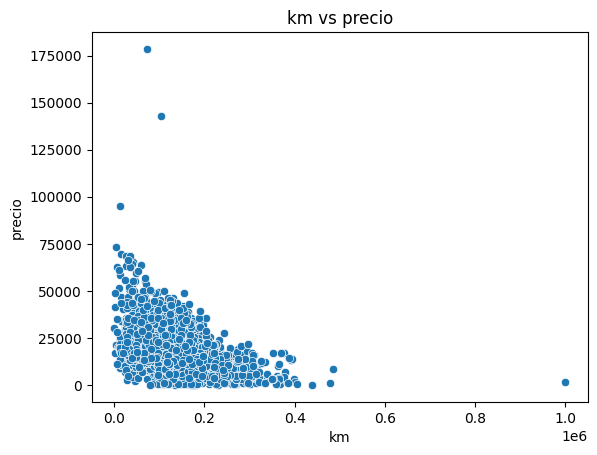

In [366]:
# km vs precio
sns.scatterplot(x='km', y='precio', data=df)
plt.title('km vs precio')
plt.show()

### Potencia vs precio

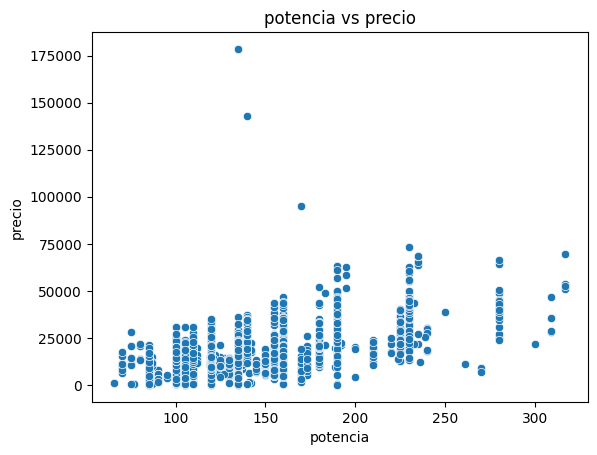

In [367]:
# potencia vs precio
sns.scatterplot(x='potencia', y='precio', data=df)
plt.title('potencia vs precio')
plt.show()

### Tiempo vs precio

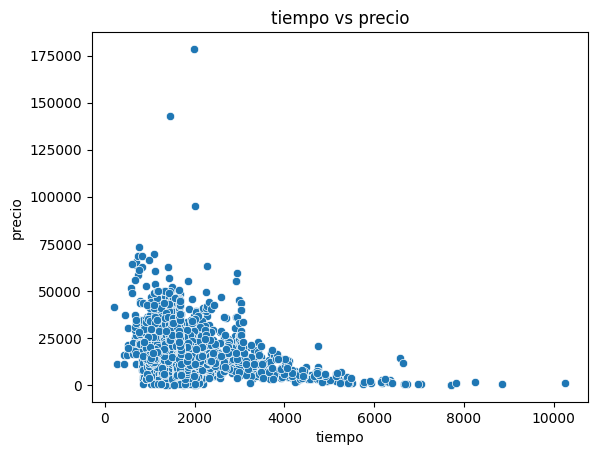

In [368]:
sns.scatterplot(x='tiempo', y='precio', data=df)
plt.title('tiempo vs precio')
plt.show()

### Modelo vs precio

In [369]:
df['modelo'].nunique()

75

#### Ya que hay 75 valores unicos, vamos a dividir este analisis de los modelos de los coches en dos grupos divididos por la mitad.

In [370]:
unique_models = df['modelo'].unique()
half = len(unique_models) // 2
models_group_1 = unique_models[:half]
models_group_2 = unique_models[half:]

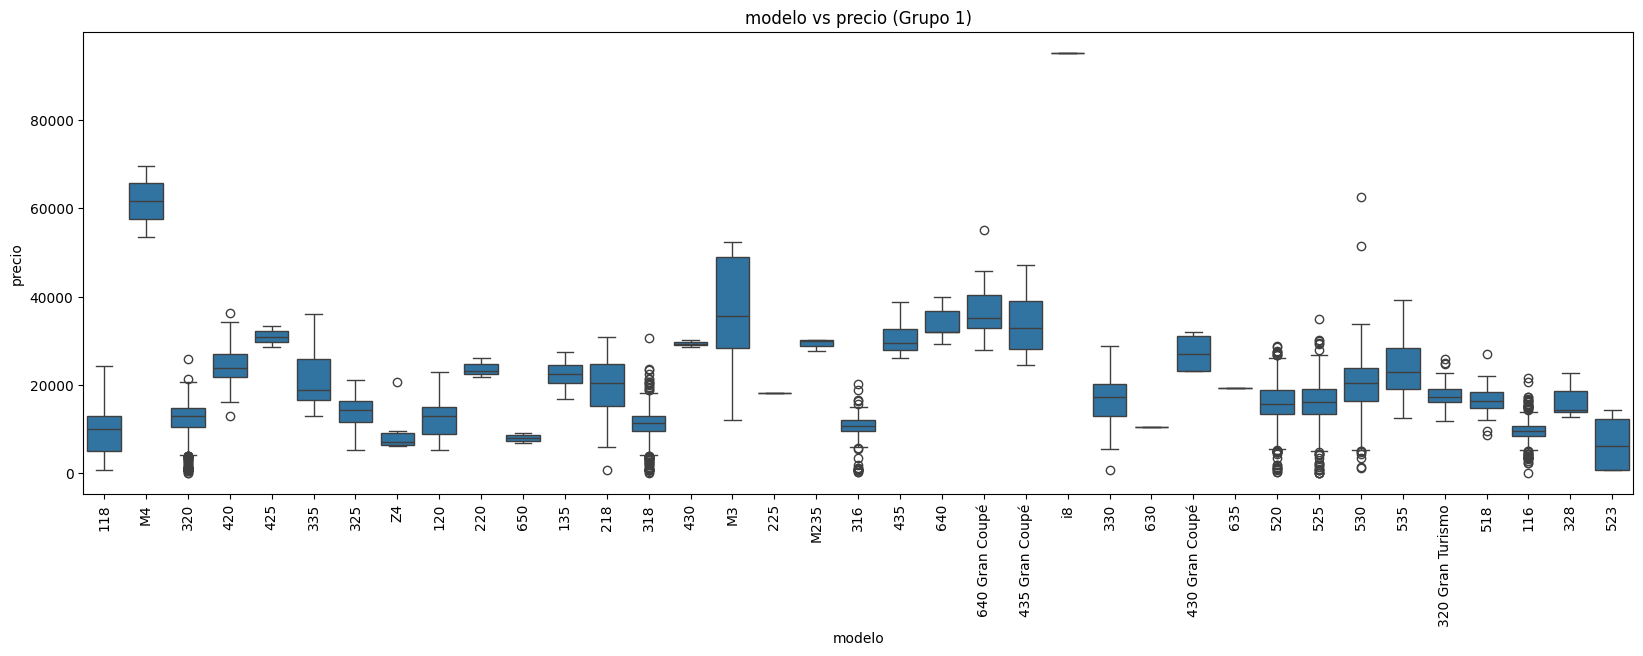

In [371]:
# modelo vs precio (Grupo 1)
plt.figure(figsize=(20, 6))
sns.boxplot(x='modelo', y='precio', data=df[df['modelo'].isin(models_group_1)])
plt.title('modelo vs precio (Grupo 1)')
plt.xticks(rotation=90)
plt.show()


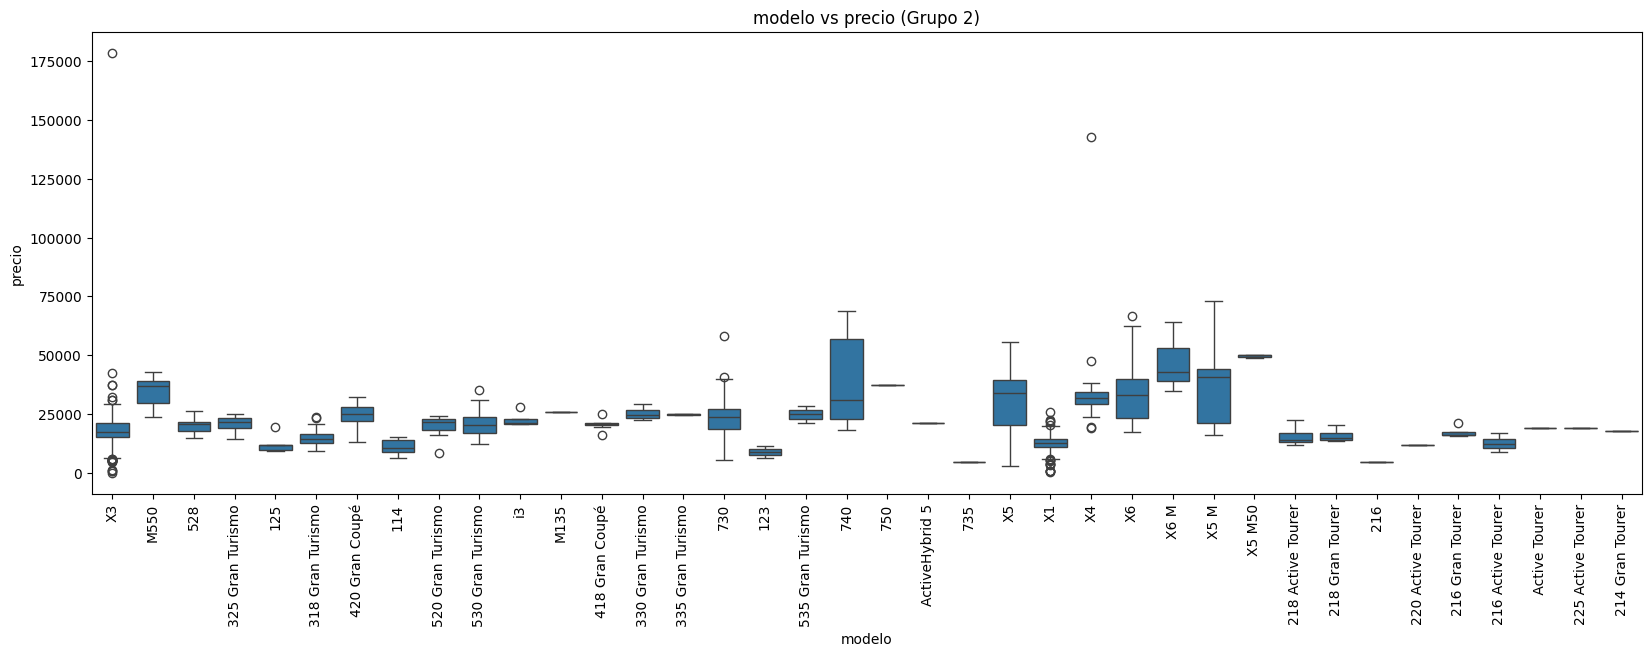

In [372]:
# modelo vs precio (Grupo 2)
plt.figure(figsize=(20, 6))
sns.boxplot(x='modelo', y='precio', data=df[df['modelo'].isin(models_group_2)])
plt.title('modelo vs precio (Grupo 2)')
plt.xticks(rotation=90)
plt.show()

### Tipo de gasolina vs precio

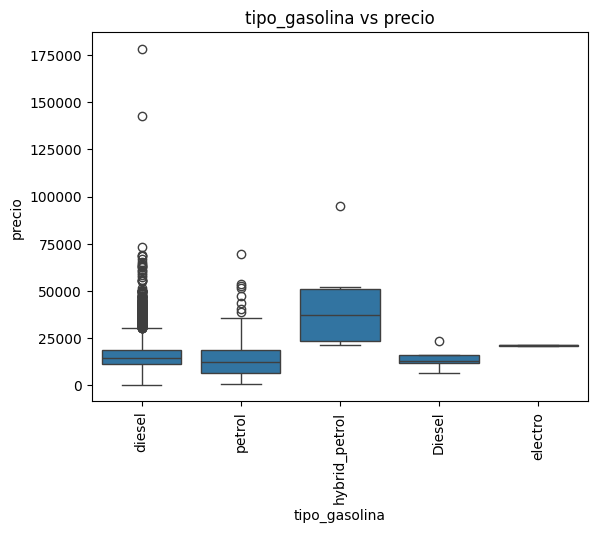

In [373]:
# tipo_gasolina vs precio
sns.boxplot(x='tipo_gasolina', y='precio', data=df)
plt.title('tipo_gasolina vs precio')
plt.xticks(rotation=90)
plt.show()

### Color vs precio

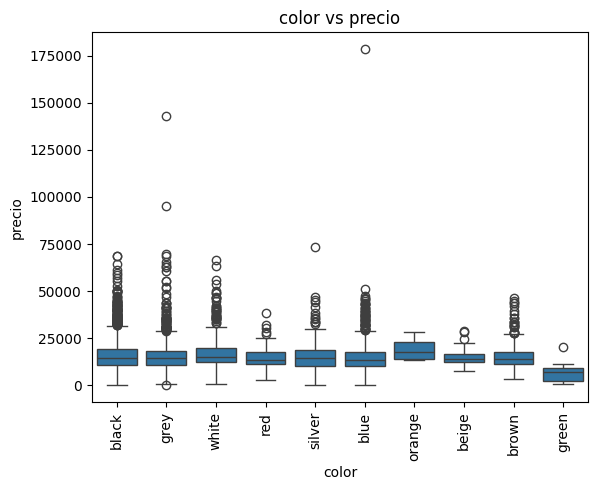

In [374]:
sns.boxplot(x='color', y='precio', data=df)
plt.title('color vs precio')
plt.xticks(rotation=90)
plt.show()

### Tipo de coche vs precio

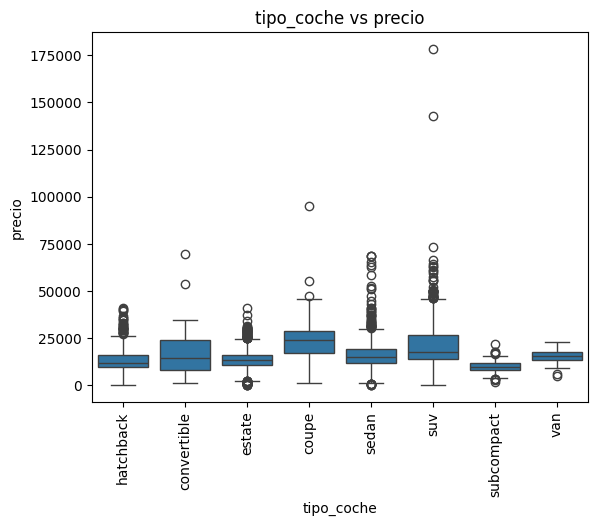

In [375]:
sns.boxplot(x='tipo_coche', y='precio', data=df)
plt.title('tipo_coche vs precio')
plt.xticks(rotation=90)
plt.show()

### Columnas booleanas vs target

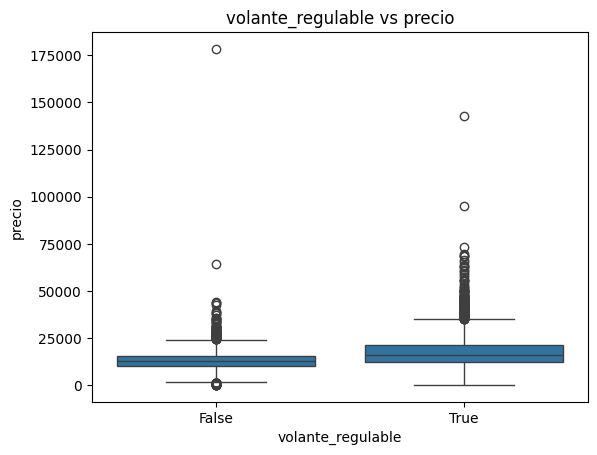

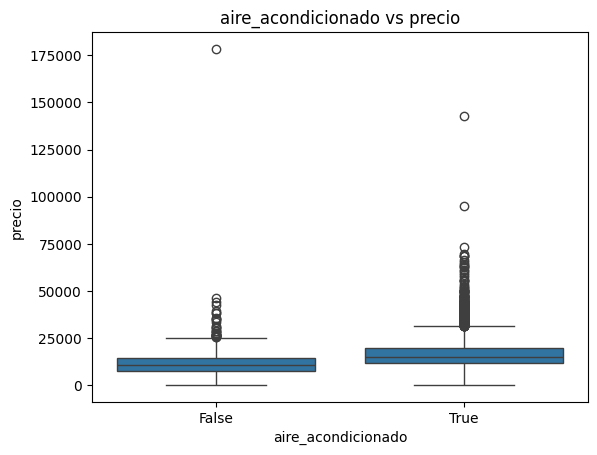

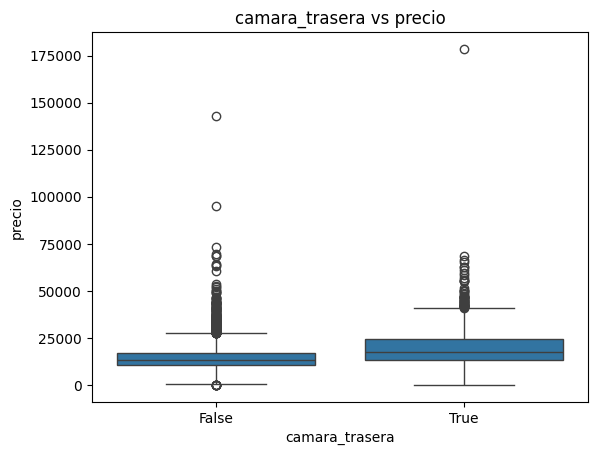

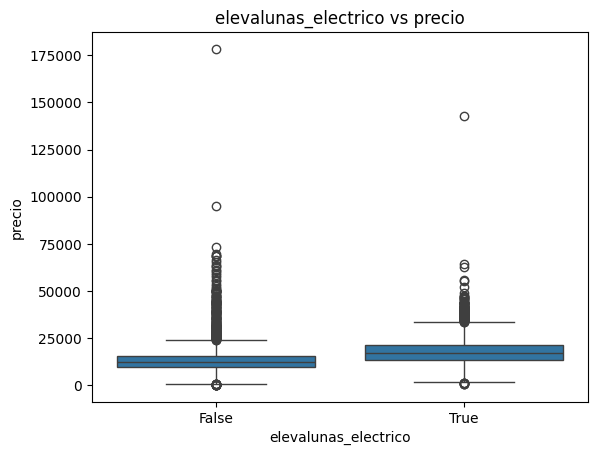

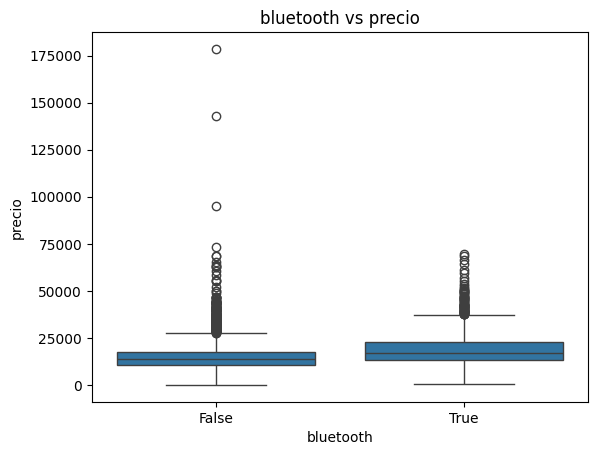

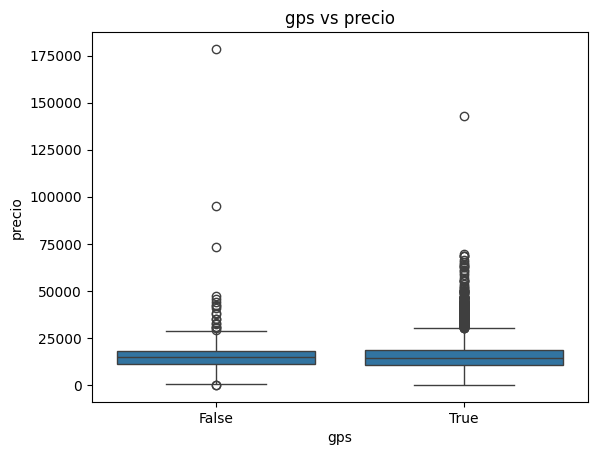

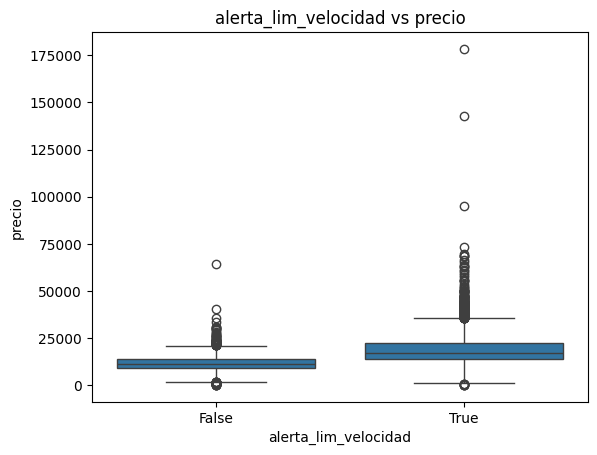

In [376]:
columnas_booleanas = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 
             'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']

for var in columnas_booleanas:
    sns.boxplot(x=var, y='precio', data=df)
    plt.title(f'{var} vs precio')
    plt.show()


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4808 non-null   object 
 1   km                    4808 non-null   float64
 2   potencia              4808 non-null   float64
 3   tipo_gasolina         4808 non-null   object 
 4   color                 4808 non-null   object 
 5   tipo_coche            4808 non-null   object 
 6   volante_regulable     4808 non-null   bool   
 7   aire_acondicionado    4808 non-null   bool   
 8   camara_trasera        4808 non-null   bool   
 9   elevalunas_electrico  4808 non-null   bool   
 10  bluetooth             4808 non-null   bool   
 11  gps                   4808 non-null   bool   
 12  alerta_lim_velocidad  4808 non-null   bool   
 13  precio                4808 non-null   float64
 14  tiempo                4808 non-null   int16  
dtypes: bool(7), float64(3

# Transformación de categóricas a numéricas.

### Convertirmos las variables booleanas a int

In [ ]:
df_transformado = df.copy()

bool_vars = ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']
for var in bool_vars:
    df_transformado[var] = df_transformado[var].astype(int)


### Aplicar One-Hot Encoding a las variables categóricas

In [ ]:
cat_vars = ['modelo', 'tipo_gasolina', 'color', 'tipo_coche']
df_transformado = pd.get_dummies(df_transformado, columns=cat_vars, drop_first=True)